In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import Axes3D

In [2]:
X,y = make_circles(n_samples=500,noise=0.02)

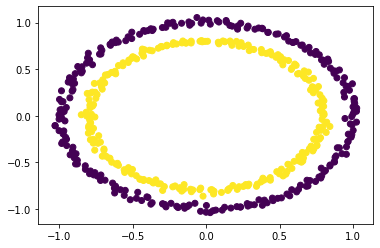

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [4]:
x1 = X[:,0]
x2 = X[:,1]
x3 = x1**2 + x2**2
X_ = np.zeros((X.shape[0],3))
X_[:,:-1] = X
X_[:,-1] = x3
X=X_

In [5]:
def plot3D(X,y):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d')
    x1 = X[:,0]
    x2 = X[:,1]
    x3 = X[:,2]
    ax.scatter(x1,x2,x3,zdir='z',s=20,c=y,depthshade=True)
    return ax

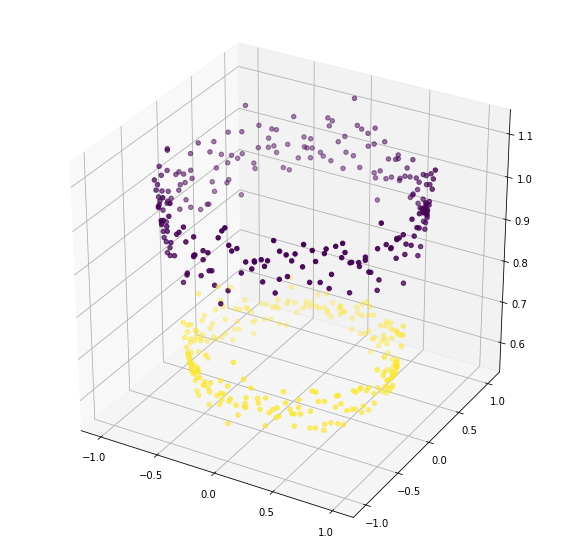

In [6]:
ax = plot3D(X,y)
plt.show()

# Logistic Regression

In [7]:
model = LogisticRegression()
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
acc = cross_val_score(model,X[:,:-1],y,cv=5).mean() * 100
print("Accuracy for 2D data",acc)

Accuracy for 2D data 45.0


In [9]:
acc = cross_val_score(model,X,y,cv=5).mean()*100
print("Accuracy for 3D data",acc)

Accuracy for 3D data 100.0


In [10]:
coef = model.coef_[0]
intercept = model.intercept_[0]

In [11]:
x1 = np.arange(-1.5,1.5,0.1)
x2 = np.arange(-1.5,1.5,0.1)
xx,yy = np.meshgrid(x1,x2)
z = -(coef[0]  * xx + coef[1] * yy + intercept)/coef[2]

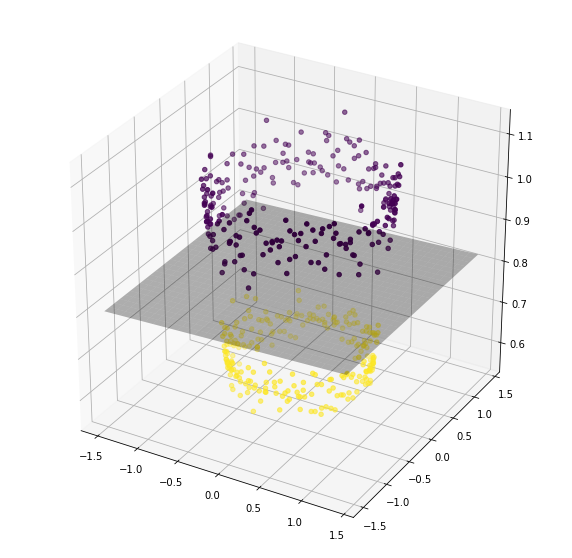

In [17]:
ax = plot3D(X,y)
ax.plot_surface(xx,yy,z,color='black',alpha=0.3)
plt.show()